<a href="https://colab.research.google.com/github/yamauchih/colab/blob/main/pi_is_4_quater_ja_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\pi = 4?$

$\pi = 4$ の証明という話がインターネット上にでまわっている。議論を追っていくと，確かにそういう「気がする」，そして「面白い」「不思議」で終わっているものがほとんどである。私は後ここから一歩踏み込むと，「曲線の長さとは何か」「見た目に似ているものと本質の違い」に理解が進むのに，その話があまりないことが残念である。このノートでは $\pi = 4$ の証明のどこがおかしいのかを解説し，同じ議論に基づけば曲線の長さは任意に定義できることを示す。そして，そうならないために数学で曲線の長さをどう定義しているのかを示す。「見た目でそう感じる」のと「事実」が違う良い例だと思う。「よい顔，外見をしている人が皆良い人とは限らない」ことを少し考えてもらえたらうれしいと思う。

## はじめに

$\pi = 4$ の証明という話がインターネット上にでまわっている。基本的には長方形を折り返す操作を使って正方形の辺の長さと円周の長さが同じに見えるようにして証明とされている。これは，長方形の平行な組の辺の長さが同じなので見た目にもわかりやすい，という感じがある。あるいは，マンハッタン距離は変化しないということを使って，円を囲む正方形の辺の長さが円周と同じという形の証明というものもあるが，基本的には同じ考え方である。

これが興味深いのは直観に反することであること，マンハッタン距離が変化しないということのもわかりやすい，の２点があるからだと思う。しかし，そうすると Looking Glass Universe のコメントにあったように，曲線の長さとはいつ何を信じていいのかわからなくなって混乱してしまう。

一方，私が見た限りのビデオや解説のほとんどが，「面白い」「不思議」のレベルで止まっている。これに私はもやもやする。これから曲線の長さとは何かの理解に一歩踏み込むことで，なぜ
$\pi = 4$ ではないのかが分かったまで行きたい。そのためにこのノートを書いている。

結論を言うと，実は，円周の長さを測っていない，見た目が似ている，ということで「わかった気になる」議論になっている。ただ，見た目と本質の区別はつきにくいことを示す好例でもある。「かっこいい人や服装のちゃんとした人の言うことを信頼してしまう。」「服装がだらしない人のことは信頼できないと思ってしまう。」など，人間の脳は生き延びるために一瞬で何かを判断するように進化してきたので，見た目や印象というのはなかなか避けられない。

このノートブックでは，曲線の長さとは何かに立ち返り，いわゆる $\pi = 4$ の証明のどこがおかしいのかを考えていく。そのうえで，曲線の長さの定義とはずれた場合，曲線の長さは任意に定義することを示す。

最後に曲線とフラクタルそして，曲線と一様収束の条件との関係を示して曲線の長さについての理解を深める。これによって少しでも混乱から抜け出せたらうれしいと思う。


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math

## 正方形とそれに内接する円

ここでは円周と正方形の辺の長さの関係を考える。簡単のために，円の 4 分の 1 の部分とそれに対応する正方形を考える。

半径 1 の円の方程式は，$x^2+y^2=1$ であるので，第一象限のみを考える ($0 \le x ≤ 1$) と，$y = \sqrt{1-x^2}$ を考えれば良い。



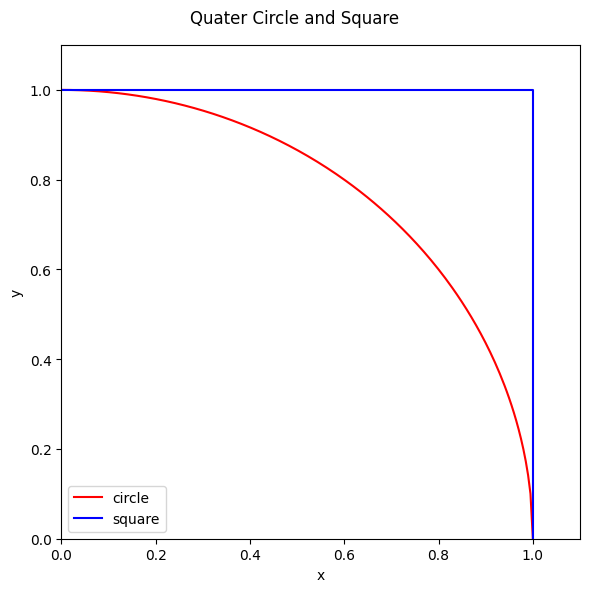

In [ ]:
# Parameters
unit_length = 1.0  # square edge length, also the radius of the quoter circle
N = 200  # number of spatial points

# quoter circle equation
def f_circle(x):
  return np.sqrt(1 - x**2)

# Spatial grid for the circle. circle x, circle y
cx = np.linspace(0, unit_length, N)
cy = f_circle(cx)

# square x, y (the zeros degree)
s0_x = [0, 1, 1]
s0_y = [1, 1, 0]

# Set up the figure and axis
fig, axis = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Quater Circle and Square')

# Plot the figure
axis.plot(cx, cy, "r-", label="circle")
axis.plot(s0_x, s0_y, "b-", label="square")

# Set axis properties for all plots
axis.set_xlim(0, 1.1)
axis.set_ylim(0, 1.1)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.legend()
axis.grid(False)

plt.tight_layout()
plt.show()


## 正方形の辺をたたむ Folding the square

以下の図で正方形の頂点は $(1, 1)$ にある。その点を通る傾き 1 の直線は，$y - 1= x - 1$ より，$y = x$ である。この直線と円との交点は $x^2+y^2=1$ との交点であるので，$x$ について解くと，交点は $(\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2})$ とわかる。

一般に，頂点が $(x_1, y_1)$ の時，その点を通る傾き 1 の直線は，$y - y_1= x -x_1$ より，$y = x - x_1 + y_1$ である。ここで $\alpha = -x_1 + y_1$ とすれば，この直線と円 $x^2+y^2=1$ との交点を連立方程式を解くことで求めることができる。

すると，$x^2 + (x+\alpha)^2 - 1 = 0$ から，$2x^2 +2 \alpha x + \alpha^2 -1 = 0$ より，これを解いて，

$x = \frac{1}{2} (-\alpha \pm \sqrt{-\alpha^2 +2})$

$y = x+\alpha$

が得られる。ここで第一象限のみを考えているので $x, y >= 0$ であるので，

$x = \frac{1}{2} (-\alpha + \sqrt{-\alpha^2 +2})$

が得られる。これを使って頂点を次々に折りたたんでいく。折りたたんでも，辺の長さは同じであるから，正方形の辺の長さを保ったまま，形は円周に近似されていく。ここで，形は近付いていくように見えるが，長さは近付いていない。これが $\pi = 4$ の証明のトリックになっている。余談だが，フラクタルという分野では，これと似た方法でシェルピンスキーのガスケットのように，辺の長さ無限，占める面積 $0$ という図形が生成できる。



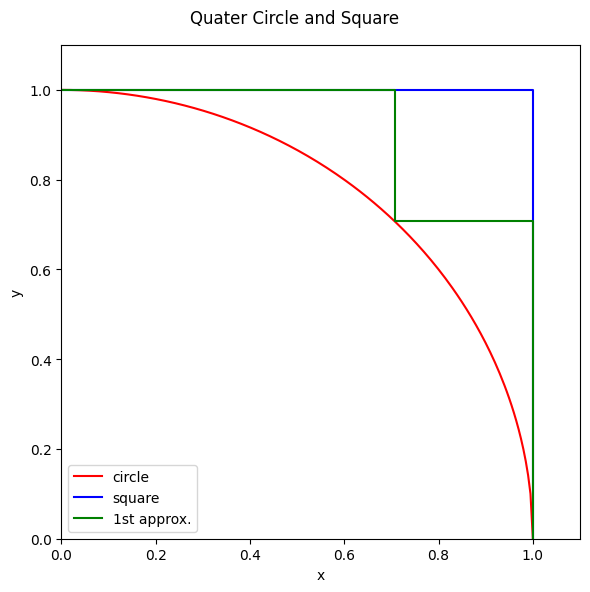

In [ ]:
# Parameters
unit_length = 1.0  # square edge length, also the radius of the quoter circle
N = 200  # number of spatial points

# quoter circle equation
def f_circle(x):
  return np.sqrt(1 - x**2)

# Spatial grid for the circle. circle x, circle y
cx = np.linspace(0, unit_length, N)
cy = f_circle(cx)

# square x, y (the zeros degree)
p0   = [1, 1]
s0_x = [0, p0[0], 1]
s0_y = [1, p0[1], 0]


# Get the intersect point on the unit circle from the corner point
# $point=(x_1, y_1)$
def get_intersect_point_on_circle_from_corner_point(point):
  x1 = point[0]
  y1 = point[1]
  a = -x1 + y1
  x = (1.0/2.0) * (-a + math.sqrt(2 -(a**2)))
  y = x + a
  # print(f"In: ({x1}, {y1}), intersect  ({x},{y})")
  return (x, y)

# get new points from the intersection point p0
def get_new_points_from_intersection_point(p0):

  p1 = get_intersect_point_on_circle_from_corner_point(p0)
  new_points_x = [p1[0], p1[0], p0[0]]
  new_points_y = [p0[1], p1[1], p1[1]]

  return (new_points_x, new_points_y)


# square x, y (the first degree)
#  get the intersect point from (1,1) to the circle
(new_points_x, new_points_y) = get_new_points_from_intersection_point(p0)
# print(new_points_x, new_points_y)

s1_x = [0, *new_points_x, 1]
s1_y = [1, *new_points_y, 0]

# Set up the figure and axis
fig, axis = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Quater Circle and Square')

# Plot the figure
axis.plot(cx, cy, "r-", label="circle")
axis.plot(s0_x, s0_y, "b-", label="square")
axis.plot(s1_x, s1_y, "g-", label="1st approx.")

# Set axis properties for all plots
axis.set_xlim(0, 1.1)
axis.set_ylim(0, 1.1)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.legend()
axis.grid(False)

plt.tight_layout()
plt.show()

## 正方形の辺をたたむを繰り返す

以下の図のように見た目には円に正方形の辺が近づいているように見えるが，長さは変化していない。


In [ ]:
# Ternary tree node
class Ternary_tree_node(object):
    # init the node
    def __init__(self, _node_id):
        self.__node_id   = _node_id
        self.child_nodes = [None, None, None]
        # point coordinates
        self.data        = None

    def get_node_id(self):
        return self.__node_id

    def get_nb_valid_children(self):
        assert(len(self.child_nodes) == 3)
        nb_valid = 0;
        for node in self.child_nodes:
            if (node != None):
                nb_valid += 1
        return nb_valid

    def print(self):
        child_status_str = ""
        for ch in self.child_nodes:
            if (ch == None):
                child_status_str += "N,"
            else:
                child_status_str += "v,"
        print(f"[{self.__node_id}]: p={self.data}, {{{child_status_str}}}")


#
# Generate ternary tree for pi == 4
#
class Gen_ternary_tree(object):
    # init
    def __init__(self, _opt_dict):
        self.__opt_dict       = _opt_dict
        self.__is_verbose     = self.__opt_dict.get('verbose', False)

        # The start center point
        self.__p0c            = [1.0, 1.0]
        self.__cur_node_id    = 0
        self.__root_node      = None
        self.__node_count     = 1
        self.__node_list      = []
        self.__max_node_count = 0

        max_depth = int(self.__opt_dict.get('max_depth', 4))
        if (max_depth < 4):
            raise RuntimeError(f"illegal max_depth: {max_depth}, should be >=4.")
        if (max_depth > 20):
            raise RuntimeError(f"too large max_depth: {max_depth}, should be <= 20.")

        self.__max_depth      = max_depth
        print_level = int(self.__opt_dict.get('print_level', 3))
        self.set_print_level(print_level)
        self.__approx_coords  = []

        # graphviz
        self.__dot            = None
        self.__edges          = None
        self.__graphviz_fname = 'graphviz_01.gv'

    # verbose print
    def verbose_print(self, mes):
        if (self.__is_verbose):
            print(mes)

    # new a node
    def new_node(self):
        btn = Ternary_tree_node(self.__cur_node_id)
        self.__cur_node_id = self.__cur_node_id + 1
        return btn

    def get_max_depth(self):
        """Return the possible max depth"""
        return self.__max_depth

    def set_print_level(self, _level):
        if (_level < 0):
            raise RuntimeError(f"illegal print level: {_level}, should be >=0.")
        if (_level > self.__max_depth):
            raise RuntimeError(f"illegal print level: {_level}, should be <= {self.__max_depth}")
        self.__print_level    = _level


    # Get the intersect point on the unit circle from the corner point
    # $point=(x_1, y_1)$
    def get_intersect_point_on_circle_from_corner_point(self, point):
        # print(f"DEBUG: point= {point}")
        x1 = point[0]
        y1 = point[1]
        a = -x1 + y1
        # print(f"p: {x1}, {y1}, a:{a}")
        x = (1.0/2.0) * (-a + math.sqrt(2 - (a**2)))
        y = x + a
        # print(f"In: ({x1}, {y1}), intersect  ({x},{y})")
        return (x, y)

    def __get_depth_coords_sub(self, _cur_node, _cur_depth):
        # reach to the print level, print data
        if (_cur_depth == self.__print_level):
            self.__approx_coords.append(_cur_node.data)
            if (self.__is_verbose):
                _cur_node.print()
            return

        # this is leaf, it is a center node
        if (_cur_node.get_nb_valid_children() == 0):
            self.__approx_coords.append(_cur_node.data)
            if (self.__is_verbose):
                _cur_node.print()
            return

        # otherwise recurse
        for node in _cur_node.child_nodes:
            self.__get_depth_coords_sub(node, _cur_depth + 1)


    def __get_depth_coords(self):
        self.verbose_print(f"# print level: {self.__print_level}")

        # reset the coors array. The square's first coords are set here
        self.__approx_coords  = [[0.0, 1.0]]
        self.__get_depth_coords_sub(self.__root_node, 0)
        # append the last coords
        self.__approx_coords.append([1.0, 0.0])


    def __draw_tree_sub(self, _cur_node, _parent_node):
        nid = _cur_node.get_node_id()
        self.__dot.node(str(nid),
                        f"{nid}| [{float(_cur_node.data[0]):0.3}, {float(_cur_node.data[1]):0.3}]",
                        shape='record')
        # connect the parent to me
        if (_parent_node != None):
            self.__edges.add((str(_parent_node.get_node_id()),
                              str(_cur_node.get_node_id())))

        for i in range(3):
            if (_cur_node.child_nodes[i] != None):
                self.__draw_tree_sub(_cur_node.child_nodes[i], _cur_node)

    def __draw_tree(self):
        self.__dot   = Digraph(comment='Ternary tree')
        self.__edges = set()

        parent_node = None
        self.__draw_tree_sub(self.__root_node, parent_node)

        self.verbose_print(self.__edges)
        for e in self.__edges:
            self.__dot.edge(*e)

        self.verbose_print(self.__dot.source)
        self.__dot.render(self.__graphviz_fname, view=True)


    def __compute_this_level(self, _cur_node):
        """This is the current level compute
        Here, pi != 4 compute
        """
        assert (_cur_node.get_nb_valid_children() == 3)
        assert (_cur_node.data != None)

        p_last_center = _cur_node.data;
        # get the intersection point (int_x, int_y) with the circle
        point_int = self.get_intersect_point_on_circle_from_corner_point(p_last_center)
        # print(f"DEBUG: point_int: {point_int}")

        # p_left coord
        _cur_node.child_nodes[0].data = [point_int[0],     p_last_center[1]]
        _cur_node.child_nodes[1].data = [point_int[0],     point_int[1]]
        _cur_node.child_nodes[2].data = [p_last_center[0], point_int[1]]
        # for node in _cur_node.child_nodes:
        #     print(f"DEBUG: new point: {node.data}")

    # generate next level of the tree
    def __gen_next_level(self, _cur_node, _tree_depth):
        if (_tree_depth >= self.__max_depth):
            # self.verbose_print(f"# reach to the max_depth {_tree_depth}")
            return

        assert(_cur_node.get_nb_valid_children() == 0)
        for i in range(3):
            _cur_node.child_nodes[i] = self.new_node()

        # compute this level
        self.__compute_this_level(_cur_node)

        # Only recurse left and right for pi != 4
        self.__gen_next_level(_cur_node.child_nodes[0], _tree_depth + 1)
        self.__gen_next_level(_cur_node.child_nodes[2], _tree_depth + 1)


    def generate_tree(self):
        """Generate ternary tree and culculate the coords"""

        # create and set up the root node
        self.__root_node = self.new_node()
        self.__root_node.data = self.__p0c
        tree_depth = 0
        self.__gen_next_level(self.__root_node, tree_depth)
        if (self.__opt_dict.get('draw_tree', False)):
            self.__draw_tree()


    def get_coords(self, _level):
        """get the coordinates of the given _level"""

        if (self.__root_node == None):
            raise RuntimeError("No tree is generated")

        if (self.__max_depth < _level):
            raise RuntimeError(f"Cannot print the tree level {_level} more than max depth {self.__max_depth}.")

        self.set_print_level(_level)
        self.__get_depth_coords()

        # return the coordinates array
        return self.__approx_coords

# circle parameters
unit_length = 1.0  # square edge length, also the radius of the quoter circle
N = 200            # number of spatial points
# zigzag parameters
max_depth   = 10
print_level = 1
opt_dict = {
    'print_level': print_level,
    'max_depth':   max_depth,
}

gtt = Gen_ternary_tree(opt_dict)
gtt.generate_tree()

# quarter circle equation
def f_circle(x):
    return np.sqrt(1 - x**2)

# Spatial grid for the circle. circle x, circle y
cx = np.linspace(0, unit_length, N)
cy = f_circle(cx)

lv_start = 1
lv_end   = gtt.get_max_depth() + 1

# setup figure
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(False)

x0ary = [0, 1, 1]
y0ary = [1, 1, 0]
# , is ignoreing rest of the retuen values
plt_circle, = ax.plot(cx, cy, "r-", label="circle")
plt_zigzag, = ax.plot(x0ary, y0ary, "b-", label="square")
ax.legend()

def update(frame):
    print_depth = frame
    # print(f"print_depth: {print_depth}")
    compute_coords = gtt.get_coords(print_depth)
    xary = []
    yary = []
    for c in compute_coords:
        xary.append(c[0])
        yary.append(c[1])
    # a quoter circle, use set_data to update
    plt_circle.set_data(cx, cy)
    # calculate points, use set_data to update
    plt_zigzag.set_data(xary, yary)

    # plt.show()
    return plt_circle, plt_zigzag

# Create animation
anim = FuncAnimation(fig, update, frames=max_depth,
                      interval=500, blit=True, repeat=True)

plt.close()  # This prevents display of the static plot

# Display the animation in the notebook
from IPython.display import HTML
HTML(anim.to_jshtml())


## 線分の長さを近似してみる

ここに長さ $l$ の 1 本の線分があるとする。これをとても恣意的ではあるが，高さ $h$ の矩形波で近似してみる。1 波長の矩形波の図形の長さは $4 h + l$ となる。

この矩形波の半分の波長の矩形波を作ると 2 波長できる，この場合，矩形波の図形の長さは，$2 (4 h) + l = 8 h + l$ である。さらに波長を半分にすれば，図形の長さは，$2^2 (4 h) + l = 16 h + l$ である。$n$ 回波長を半分にする操作では図形の長さは，
\begin{eqnarray*}
 2^{n+2} h + l
\end{eqnarray*}
となる。当然こうしていけば，図形の長さは無限に伸びる。

しかし毎回 $h$ を減少させていけば，この矩形波は線分に近付くように「見える」。もし毎回 $h' =\frac{1}{2} h$ と高さを半分にすれば，図形の長さは，
\begin{eqnarray*}
 2^{n+2} ({\frac{1}{2}}^n h) + l &=& 2^2 h + l
\end{eqnarray*}
で一定である。

つまり，
\begin{eqnarray*}
\text{Line segment total length} =
 \begin{cases}
  \infty  & \text{if } h' > \frac{1}{2} h \\
  4h + l  & \text{if } h' = \frac{1}{2} h \\
  l       & \text{if } h' < \frac{1}{2} h \\
 \end{cases}
\end{eqnarray*}
であるから，一定の長さにしたり，線分の長さに収束させたり，無限の長さにすることもできる。

これは，多分関数 $f(x), g(x)$ があった場合，$f(x)$ が $g(x)$ に収束する時には一様収束性が必要だということと同じではないかと思う。矩形波の場合，曲線の長さの定義に従っていない。なぜなら，曲線の上にはない点を使っているからである。曲線上の上にない点を使うことで，その近似をしているような図形の長さは任意に設定できそうだ。

これが $\pi = 4$ ではない理由である。そもそも曲線上の点を使っていないので，数学的には曲線の長さを測ってはいない。しかし見た目は収束しているように見える。



In [3]:
import math
import argparse
import sys

# Calculation results visualization
import matplotlib.pyplot as plt
import numpy as np

# Generate line segments
class Gen_line_segment(object):
    # init
    def __init__(self, _opt_dict):
        self.__opt_dict   = _opt_dict
        self.__is_verbose = self.__opt_dict.get('verbose',  False)
        self.__gen_level  = 3

        self.set_gen_level(self.__opt_dict.get('gen_level', 3))

        # The initial line x, coords
        self.__init_x     = [0.0, 1.0]

        # result coordinates at self.__gen_level
        self.__height     = 1.0
        self.__seg_coords = []
        self.__x_coords   = []
        self.__y_coords   = []

    def verbose_print(self, mes):
        """verbose print"""
        if (self.__is_verbose):
            print(mes)

    def set_gen_level(self, _gen_level):
        """set the approximate level"""
        if (_gen_level < 1):
            raise RuntimeError(f'Invalid segmentation level: {_gen_level}, should be > 0.')
        if (_gen_level > 20):
            raise RuntimeError(f'Too large segmentation level: {_gen_level}, should be <= 20.')
        self.__gen_level = _gen_level

    def set_height(self, _height):
        """set the approximate segments height"""
        if (_height <= 0.0):
            raise RuntimeError(f'Invalid height: {_height}, should be > 0.')
        if (_height > 1.0):
            raise RuntimeError(f'Too large height: {_height}, should be <= 1.0.')
        self.__height = _height


    def get_x_coords(self):
        return self.__x_coords

    def get_y_coords(self):
        return self.__y_coords

    def __generate_coords(self):
        # nb_points = nb_segments + 1
        nb_segments = (2 ** self.__gen_level)
        self.__seg_coords = np.linspace(self.__init_x[0], self.__init_x[1],
                                        nb_segments + 1, endpoint=True)
        self.__x_coords = np.zeros(4 * nb_segments)
        self.__y_coords = np.zeros(4 * nb_segments)


        for seg_i in range(0, nb_segments):
            self.__x_coords[4 * seg_i + 0] = self.__seg_coords[seg_i]
            self.__x_coords[4 * seg_i + 1] = self.__seg_coords[seg_i]
            self.__x_coords[4 * seg_i + 2] = self.__seg_coords[seg_i + 1]
            self.__x_coords[4 * seg_i + 3] = self.__seg_coords[seg_i + 1]

            if (seg_i % 2 == 0):
                # up side y coords
                self.__y_coords[4 * seg_i + 0] = 0.0
                self.__y_coords[4 * seg_i + 1] = self.__height
                self.__y_coords[4 * seg_i + 2] = self.__height
                self.__y_coords[4 * seg_i + 3] = 0.0
            else:
                # down side y coords
                self.__y_coords[4 * seg_i + 0] = 0.0
                self.__y_coords[4 * seg_i + 1] = -self.__height
                self.__y_coords[4 * seg_i + 2] = -self.__height
                self.__y_coords[4 * seg_i + 3] = 0.0


    def plot_current_coords(self):
        fig, ax = plt.subplots(1, 1, figsize=(6,6))
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(False)

        # base line
        line_x = [0.0, 1.0]
        line_y = [0.0, 0.0]
        ax.plot(line_x, line_y, "g-", label="line")

        # approx line
        ax.plot(self.__x_coords, self.__y_coords, "r-", label="approx")

        ax.legend()
        plt.show()


    def generate_segments(self):
        self.__generate_coords()


In [49]:
# Aniomate segments for from level 1 to max_level with constant height and plot
verbose = True
gen_level = 1
plot = False
height = 1.0
opt_dict = {}
max_level = 6

gls = Gen_line_segment(opt_dict)
gls.set_gen_level(gen_level)
gls.set_height(height)
gls.generate_segments()

# multiple level plot
x_coords = []
y_coords = []

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-1.1, 1.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(False)

# base line
line_x = [0.0, 1.0]
line_y = [0.0, 0.0]
ax.plot(line_x, line_y, "g-", label="line")
plot_seg = ax.plot(x_coords, y_coords, "r-", label=f'square wave')
ax.legend()


def update(frame):
  gen_level = frame + 1
  height_base = [0.51, 0.5, 0.49]
  gls.set_gen_level(gen_level)
  gls.set_height(height)
  gls.generate_segments()

  x_coords = gls.get_x_coords()
  y_coords = gls.get_y_coords()
  plot_seg[0].set_data(x_coords, y_coords)
  # plt.show()
  return plot_seg

# Create animation
anim = FuncAnimation(fig, update, frames=max_level,
                    interval=800, blit=True, repeat=True)

plt.close()  # This prevents display of the static plot

# Display the animation in the notebook
from IPython.display import HTML
HTML(anim.to_jshtml())


ここで毎回矩形波を細かくしていく度に高さを上記のように 3 通りに変えてみる。

\begin{eqnarray*}
\text{Line segment total length} =
 \begin{cases}
  \infty  & h' = 0.51 h \text{, left} \\
  4h + l  & h' = 0.50 h \text{, center}\\
  l       & h' = 0.49 h \text{, right}\\
 \end{cases}
\end{eqnarray*}

ということは，ジグザグの線分の長さ - 緑の線分の長さは，無限大，2, 0 である。

この例では，私の目には無限大と０の違いも見えない。自分で作っていて，いかに私の「見える」とか「感じる」ということが不確かであり，事実を見誤るかということを考えてしまった。

In [41]:
# Aniomate segments for from level 1 to max_Level with different h' and plot
verbose = True
gen_level = 1
plot = False
height = 1.0
opt_dict = {}
max_level = 7

gls = Gen_line_segment(opt_dict)
gls.set_gen_level(gen_level)
gls.set_height(height)
gls.generate_segments()

# multiple level plot
x_coords = []
y_coords = []

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plot_seg = []
label = ["S-l -> infty", "S-l = const", "S-l -> 0"]
for i in range(3):
  ax[i].set_xlim(-0.1, 1.1)
  ax[i].set_ylim(-1.1, 1.1)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('y')
  ax[i].grid(False)

  # base line
  line_x = [0.0, 1.0]
  line_y = [0.0, 0.0]
  ax[i].plot(line_x, line_y, "g-", label="line")
  plot_seg.append(ax[i].plot(x_coords, y_coords, "r-", label=label[i]))
  ax[i].legend()


def update(frame):
  gen_level = frame + 1
  height_base = [0.51, 0.5, 0.49]
  for i in range(3):
    gls.set_gen_level(gen_level)
    gls.set_height(height * height_base[i] ** gen_level)
    gls.generate_segments()

    x_coords = gls.get_x_coords()
    y_coords = gls.get_y_coords()
    plot_seg[i][0].set_data(x_coords, y_coords)
  # plt.show()
  return plot_seg[0]

# Create animation
anim = FuncAnimation(fig, update, frames=max_level,
                    interval=800, blit=True, repeat=True)

plt.close()  # This prevents display of the static plot

# Display the animation in the notebook
from IPython.display import HTML
HTML(anim.to_jshtml())


## おわりに

よく YouTube などでみかける $\pi = 4$ の証明は，マンハッタン距離はどう折れまがっても変化しないということを使っている。これは直感的であることと，見た目で収束しているように見えること，その一方で $\pi = 4$ というおかしなことが同時に起きているように見えるので興味深い。しかし，これがなぜおかしいのかについてあまり追求していないようである。今回，この $\pi = 4$ の証明では実際には曲線の長さは測っていないことを見てきた。2 階微分可能な曲線の長さは曲線上の点のみを使って定義されるのに，曲線上の点を使っていないので，矛盾が生じたように見える。そして，このようなことが起きるので，曲線の長さは曲線上の点を使ってのみ定義される。

私は見るとか，感じることは重要だと思う。しかし，「事実」と「そう見える」ということは往々にして異なることにも出会う。それはある事実が仮面をかぶっていることがあるからだ。しかし，見ることや感じることは，今回のように学びによって鋭くしたり，論理に助けられて深く理解することで見えるようになる。一見仮面をかぶっていて違いが見えないいうことでも，学びによってその違いが見えるようになり，事実に近づくことができるのは楽しいと思う。